In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from chefboost import Chefboost as chef
from sklearn import metrics
import probabilistic_decision_tree as pdt

In [24]:
df = pd.read_csv("hepatitis.csv")

In [36]:
tf_columns = ['steroid',
              'sex',
              'antivirals',
              'fatigue',
              'malaise',
              'anorexia',
              'liver_big',
              'liver_firm',
              'spleen_palable',
              'spiders',
              'ascites',
              'varices',
              'class',
              'histology']

In [37]:
df = df.reindex(sorted(df.columns), axis=1)

In [38]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=1)

In [28]:
def seed_continuous_noises(distance, data):
    noises = make_circles(n_samples=30, noise=np.mean(data[distance]), random_state=1)
    return abs(noises[0][:, 1])

In [29]:
continuous_columns = ['alk_phosphate', 'age', 'bilirubin', 'sgot', 'albumin', 'protime']
nosies = dict()
for continuous_column in continuous_columns:
    nosies[continuous_column] = seed_continuous_noises(continuous_column, df)
for format_column in tf_columns:
    nosies[format_column] = np.random.randint(2, size=30)
noises_df = pd.DataFrame(nosies)

In [30]:
noises_df = noises_df.reindex(sorted(noises_df.columns), axis=1)
noises_df = pd.concat([X_train, noises_df])
noises_df['patient'] = np.arange(0, len(noises_df['class']))
for column in df.columns:
    if column in tf_columns:
        noises_df[column] = noises_df[column].replace((0, 1), (False, True)).astype(type(False))
        X_test[column] = X_test[column].replace((0, 1), (False, True)).astype(type(False))

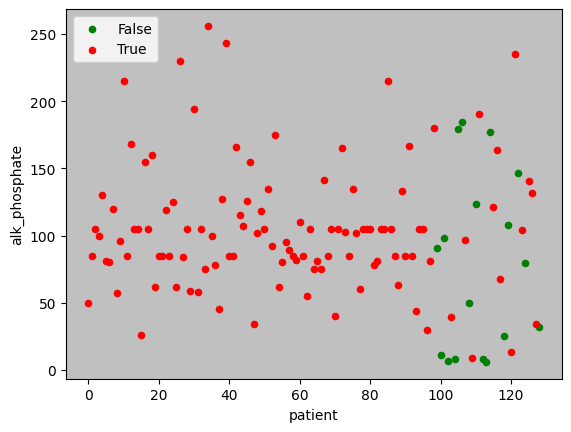

In [31]:
colors = {False: 'green', True: 'red'}
fig, ax = plt.subplots()
ax.set_facecolor('silver')
grouped = noises_df.groupby('class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='patient', y='alk_phosphate', label=key, color=colors[key])
plt.show()

In [13]:
config = {'algorithm': 'C4.5'}
model = chef.fit(noises_df, config=config, target_label='class')

[INFO]:  6 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  2.3029234409332275  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.056847545219638244
MSE:  0.02842377260981912
RMSE:  0.1685935129529577
RAE:  0.1934294858246657
RRSE:  0.3945814692542817
Mean:  0.7596899224806202
MAE / Mean:  7.482993197278911 %
RMSE / Mean:  22.192411398909737 %


In [9]:
predictions = []
for index, instance in X_test.iterrows():
    prediction = chef.predict(model, instance)
    predictions.append(prediction)

NameError: name 'model' is not defined

In [74]:
print("Accuracy:", metrics.accuracy_score(X_test['class'], predictions))

NameError: name 'predictions' is not defined

In [9]:
for column in df.columns:
    if column in tf_columns:
        noises_df[column] = noises_df[column].replace((0, 1), (False, True)).astype(type(False))
        X_test[column] = X_test[column].replace((0, 1), (False, True)).astype(type(False))

In [39]:
information_gain, best_split, _, _ = pdt.max_information_gain_split(X_test['alk_phosphate'], X_test['class'])
(information_gain, best_split)

(0.006559332140727514, 85)

In [16]:
max_depth = 5
min_samples_split = 5
decisiones = pdt.train_tree(noises_df, 'class', True, max_depth, min_samples_split)
decisiones

{'malaise in  [True]': [{'albumin <=  2.2': [{'albumin <=  0.7816971811462268': [True,
      False]},
    {'albumin <=  7.599246807722191': [True, False]}]},
  {'age <=  56.49916668086771': [{'age <=  41.76527577643465': [{'bilirubin <=  0.7363671194853463': [True,
        False]},
      True]},
    False]}]}

In [17]:
prediction = []
num_obs = len(X_test['class'])

for i in range(num_obs):
    obs_pred = pdt.clasificar_datos(X_test.iloc[i, :], decisiones)
    prediction.append(obs_pred)

print("Predictions: ", prediction,
      "\n\nReal Values:", X_test['class'][:num_obs].to_numpy())

['malaise', 'in', '[True]']


TypeError: 'in <string>' requires string as left operand, not numpy.bool_

In [30]:
question = list(decisiones.keys())[0]
question.split()

['albumin', '<=', '1.0086434487883846']

In [94]:
result = np.array(noises_df['class'][:num_obs].to_numpy() == prediction)

C:\Users\TNGU\AppData\Local\Temp\ipykernel_32496\2189575612.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  result = np.array(noises_df['class'][:num_obs].to_numpy() == prediction)


In [95]:
len(result[result == True]) / len(noises_df['class'])

0.09302325581395349

In [39]:
result

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
        True,  True,